<a href="https://colab.research.google.com/github/alvinadar/Manufacturing-Defect-Detection-Using-BDSCAN/blob/main/59_1_DBSCAN_Gradio_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manufacturing defects are common and can sometimes go undetected. However, with the help of AI and machine learning, we can predict defects in a manufacturing environment using unlabeled data. In this example, we will use DBSCAN to identify defect patterns.In this example, we will use DBSCAN to identify defect patterns implement a GUI using Gradio to work on the prediction.


`In this example we are going to look into defect where when there is a lapse in the dimension x or y, machine should be able to notify as this is a defect.`

`The following system is develop by manufacturers to replace humans repetative work to identify defects in production line.`

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Simulate manufacturing defect data

In [2]:
np.random.seed(42)
normal_parts = np.random.normal(loc=[5, 5], scale=0.5, size=(100, 2))
defective_parts = np.random.normal(loc=[7, 8], scale=0.2, size=(5, 2))  # Outliers
#This line combines the normal_parts and defective_parts arrays vertically using np.vstack, creating a single dataset containing both types of parts. This combined dataset will be used for further analysis.
data = np.vstack((normal_parts, defective_parts))

# Standardize data

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN

In [4]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

# Add labels to DataFrame

In [5]:
df = pd.DataFrame(data, columns=['dimension_x', 'dimension_y'])
df['cluster'] = labels

In [6]:
df

,dimension_x,dimension_y,cluster
0,5.248357,4.930868,0
1,5.323844,5.761515,0
2,4.882923,4.882932,0
3,5.789606,5.383717,0
4,4.765263,5.271280,0
...,...,...,...
100,7.071557,8.112157,-1
101,7.216610,8.210760,-1
102,6.724466,7.812435,-1
103,7.103007,8.102757,-1


In [7]:
df['cluster'].unique()

array([ 0, -1])

# Plot results

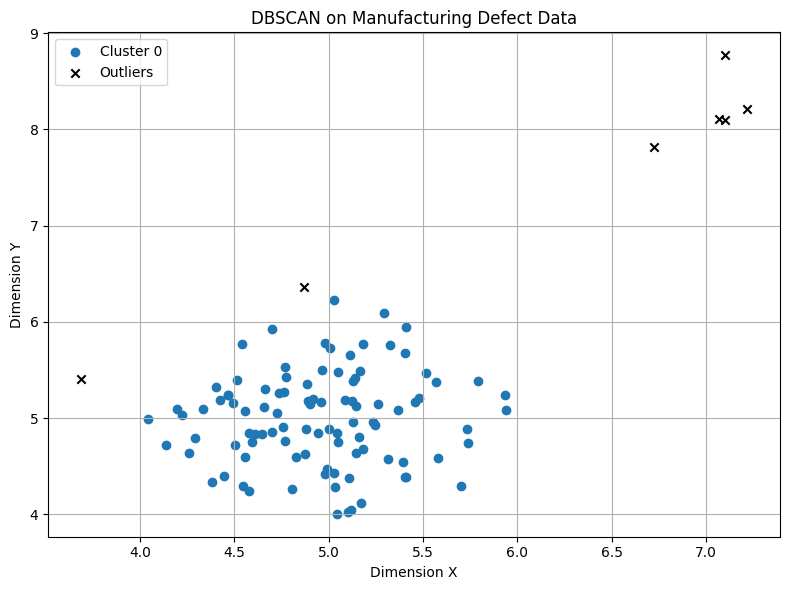

In [8]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    cluster_data = df[df['cluster'] == label]
    if label == -1:
        plt.scatter(cluster_data['dimension_x'], cluster_data['dimension_y'], c='black', marker='x', label='Outliers')
    else:
        plt.scatter(cluster_data['dimension_x'], cluster_data['dimension_y'], c=[color], label=f'Cluster {label}')

plt.title("DBSCAN on Manufacturing Defect Data")
plt.xlabel("Dimension X")
plt.ylabel("Dimension Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Evaluate the clustering outcome with silhouette score.

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
silhouette_avg = silhouette_score(data_scaled, labels)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.6989099380982094


#Create a GUI to utilize the trained model

#Create a prediction function for new input

In [11]:
def predict_defect(dimension_x,dimension_y):
  new_point = np.array([[dimension_x,dimension_y]])
  new_point_scaled = scaler.transform(new_point)
  label = dbscan.fit_predict(np.vstack([dimension_x,dimension_y]))[-1]
  return "Outlier(Defective Part)" if label == -1 else f"Cluster {label} (Normal Part)"

In [12]:
predict_defect(7.1,8.7)

'Outlier(Defective Part)'

#Create the Gradio interface

In [13]:
pip install gradio

In [14]:
import gradio as gr


In [15]:
demo = gr.Interface(fn = predict_defect,
                    inputs = [
                        gr.Number(label="Dimension X"),
                        gr.Number(label ="Dimension Y")
                    ],
                    outputs = "text",
                    title ="Manufacturing Defect Detection using DBSCAN",
                    description="Enter part dimensions to predict if its defective or normal based on DBSCAN clustering."
)

#Launch Gradio App
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8270ff0ff53b6f6198.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
